This is a simple multi layer perceptron network which is trained for the mnist dataset. Mnist is a dataset of handwritten digits. We will classify the digits in this very basic model.

In [6]:
import tensorflow as tf

The mnist dataset is already present in tensorflow as it is a very common dataset. We will simply grab it from there.

In [8]:
from tensorflow.examples.tutorials.mnist import input_data

We will create a temporary file to store our dataset in. 

In [10]:
mnist=input_data.read_data_sets("/tmp/data",one_hot=True)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


Check type and shape of mnist object. It's an array of images

In [11]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [12]:
mnist.train.images.shape

(55000, 784)

In [13]:
mnist.train.images[200].shape

(784,)

(784,) means it's a single line array


In [14]:
mnist.train.images[200].reshape(28,28)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

most elements are blank, those which arent are a value between 0-1 representing darkness of the cell in that image.

In [15]:
sample = mnist.train.images[200].reshape(28,28)

In [16]:
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

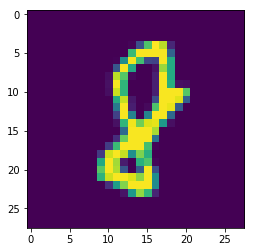

In [18]:
plt.imshow(sample) #imshow is a function which shows the image represented by the array

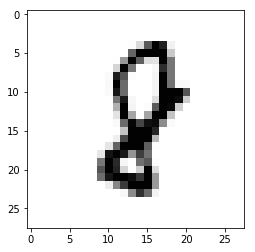

In [19]:
plt.imshow(sample,cmap='Greys')

Now, we define our basic parameters which we require to built our multi layer perceptron.

In [20]:
learning_rate=0.001 #how fast we adjust our cost function
training_epochs=15 #number of iterations we make through our network to come to an output
batch_size=100 #Size of batches of training data

In [21]:
no_classes=10 #no of classification results 0-9

In [22]:
no_sample=mnist.train.num_examples #size of training dataset

In [23]:
n_input=784 

In [24]:
n_hidden_1=256
n_hidden_2=256
#no of neurons in hidden layers. 256 because that's how a computer stores the image values in 8-bit color coding

Now, we'll take our input and send it to this function. First it will go through the 1st hidden layer of 256 neirons and then similarly through the second. The data will begin to have weight attached to it as it moves in between the layers. The weight is initialized as random value. We multiply the actual value by the weight and add the bias to it.
Consider a scenario where the input is zero, then no matter how much weight we multiply it with it will remain zero. To avoid such a situation we add a bias.

In [25]:
def multilayer_perceptron(x,weigths,biases):
    '''
    x:placeholder for input data
    weights: dict of weights
    iases: dict of biases
    '''
    #First hidden layer with Relu activation
    layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    #relu(x*w+b) -> f(x)=max(0,x)
    layer_1=tf.nn.relu(layer_1)
    
    #Second hidden layer
    layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2=tf.nn.relu(layer_2)
    
    #Last output layer
    out_layer=tf.matmul(layer_2,weights['out']) + biases['out']
    
    return out_layer

    
    
    
    

Now, we define the weights and biases dictionary.

In [26]:
weights ={
    'h1' : tf.Variable(tf.random_normal([n_input,n_hidden_1])), 
    #this gives us a matrix of random values with n_input rows and n_hidden_1 columns
    'h2' : tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_hidden_2,no_classes]))
}

In [27]:
biases={
    'b1' : tf.Variable(tf.random_normal([n_hidden_1])), 
   
    'b2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([no_classes]))
}

In [28]:
x=tf.placeholder('float',[None,n_input])

In [29]:
y=tf.placeholder('float',[None,no_classes])

In [30]:
pred= multilayer_perceptron(x,weights,biases)

In [31]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Training the model

In [32]:
sess=tf.InteractiveSession()

In [33]:
init=tf.global_variables_initializer()

In [34]:
sess.run(init)

In [35]:
for epoch in range(training_epochs):
    avg_cost=0.0
    total_batch=int(no_sample/batch_size)
    for i in range(total_batch):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        _,c=sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        avg_cost+=c/total_batch
    print('Epoch: {} cost{}'.format(epoch+1,avg_cost))
print('Model completed training 15 epochs')


Epoch: 1 cost173.4820471780951
Epoch: 2 cost41.23739495938469
Epoch: 3 cost26.023375003121107
Epoch: 4 cost18.00145070942965
Epoch: 5 cost13.324469550712537
Epoch: 6 cost9.882085819217291
Epoch: 7 cost7.563053306239744
Epoch: 8 cost5.608032681535566
Epoch: 9 cost4.312384896646343
Epoch: 10 cost3.296301012925264
Epoch: 11 cost2.373167197779085
Epoch: 12 cost1.8501662866515092
Epoch: 13 cost1.3669242697256991
Epoch: 14 cost1.0070872045078956
Epoch: 15 cost0.85257364884593
Model completed training 15 epochs


# Model Evaluation

In [36]:
correct_preds=tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [37]:
correct_preds=tf.cast(correct_preds,'float')

In [38]:
accuracy=tf.reduce_mean(correct_preds)

In [39]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.9461